# Holdout, Cross-validation and t-test

Using the `iris` data set.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

**Notes from class** <br>
Modelos <br>
- Model(fit, predict)
- Evaluation metrics (error rate, acc, spec, sens, ROC, ---, F-measure)
- Validation method
    - k-fold cross-validation method - each fold TP,FP,TN,FN (T/F,+/-) for the validation sets, not for the training sets. Accuracy: $$\frac{TP+TN}{TP+TN+FP+FN}$$
    - leave-one-out: n-fold cross-validation
    - bootstrapping: you chose (for example) 70% for training and 30% for validation, then you take several samples of 70% and train them

# Holdout, Cross-validation and t-test

Using the `iris` data set.

**Holdout**: similar to bootstrapping but only done once. I take oe subset for training and another for testing. The test set is the holdout set. You should **never** evaluate your model in sets that were for training, you always evaluate it in sets never used before. <br>
**T-test**: statistical test. suppose that you train a model and you test it in your test set and it gives you 86% of accracy. Now you train another model in the same data set andd test in the same test set, you get 89% of accuracy. How do you knoww if 89% better than 86%? It depends on many things: size of data, error of my model - either you calculate the std for each one of the folds to get the error or you do the t-test. T-test compares each of the results, makes the difference between the error between them, and  calculates the probability of it being by chance or not. Then you calculate the p-value and if your results say that your p is less than 0.05 (95% of confidence), then 86% is different than 89%, then you can say that 89% is better than 86%.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

## "Train" and evaluate

Build a model for 3NN using tht `KNeighborsClassifier` from SciKitLearn.
Measure the accuracy on the training data. This is an over optimistic estimate of accuracy. Not to be trusted

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
y_model = model.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

0.96

## Holdout

With holdout we split the data set in train and test sets. The evaluation will tend to have worse results. But not necessarily always.

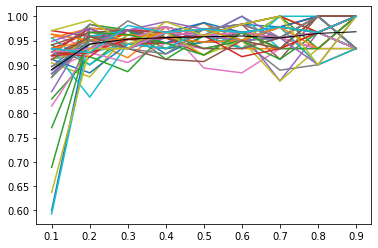

In [17]:
from sklearn.model_selection import train_test_split
# split the data with 90% for the training set
# parameter random_state=0 defines the seed
avg_scores = np.zeros(9)

for j in range(50):
    scores = np.empty(9)
    sizes = np.empty(9)
    for i in range(1,10):
        size = i*0.1
        sizes[i-1] = size

        X1, X2, y1, y2 = train_test_split(X, y, train_size=size)

    # fit the model on one set of data
        model.fit(X1, y1)

    # evaluate the model on the second set of data
        y2_model = model.predict(X2)
        scores[i-1] = accuracy_score(y2, y2_model)
    
    avg_scores += scores
    plt.plot(sizes,scores)
avg_scores /= 50
plt.plot(sizes,avg_scores,color='k',linewidth=1.)

## Cross validation (2 fold, from scratch)

A 2-fold cross validation from scratch. Split data in two equally sized folds. Train with one and test on the other and switch roles. Now you have two accuracy values that you can also average to obtain a more robust estimate.

In [46]:
# 2-fold Cross Validation
X1, X2, y1, y2 = train_test_split(X, y, train_size=0.5)
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.9333333333333333, 0.96)

## k-fold Cross Validation

Method `cross_val_score` applies CV to a data set using a given model (in fact, using an algorithm). The `cv` argument can define the number of folds we want. The output is an array of scores (accuracy by default, but we can calculate other scores). 

In [23]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, X, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

The mean and standard deviaton of the values of accuracy give us information about the random variable $Accuracy$ for this particular dataset. We can also plot these values.

In [55]:
scores.mean(), scores.std()

(0.96, 0.024944382578492935)

## Compare 1NN and 5NN

Perform 10 fold cross validation with 1NN and 5NN. Observe the two samples of ten accuracy values. Look at the means. The score of 5NN will tend to be better because 1NN tends to overfit.

In [24]:
# compare 1-NN with 5-NN on 10 fold CV
import numpy as np
from scipy import stats

model_1 = KNeighborsClassifier(n_neighbors=1)
model_5 = KNeighborsClassifier(n_neighbors=5)

scores_1=cross_val_score(model_1, X, y, cv=10)
scores_5=cross_val_score(model_5, X, y, cv=10)
print("scores 1:",scores_1)
print("scores 5:",scores_5)
print("mean 1:",np.mean(scores_1))
print("mean 5:",np.mean(scores_5)) #it would be better if you use the same folds fore every test that you do and then compare the resulta

scores 1: [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.86666667 1.         1.         1.        ]
scores 5: [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
mean 1: 0.96
mean 5: 0.9666666666666668


## t-test

But are the scores for 1NN and 5NN really different? Let's perform a statistical test, a $t-test$. This assumes that the accuracy has a $t-student$ distribution (no reasons to doubt that) and that the values of each sample are independent. This last assumption does not hold for the training sets. only for the test sets. However, we can still learn something from the result. But it is still optimistic. But less optimistic.  

The differen between 1NN and 5NN is not significant according to this particular experiment. Note that different experiments may give different results. But the more significant the difference, the more stable the results are.


In [50]:
from scipy import stats

model_5 = KNeighborsClassifier(n_neighbors=5)
scores_5=cross_val_score(model_5, X, y, cv=10)
print("scores 1:",scores_1)
print("scores 5:",scores_5)
print("mean 1:",np.mean(scores_1))
print("mean 5:",np.mean(scores_5))
stats.ttest_rel(scores_1, scores_5)

scores 1: [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.86666667 1.         1.         1.        ]
scores 5: [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
mean 1: 0.96
mean 5: 0.9666666666666668


Ttest_relResult(statistic=-0.5570860145311556, pvalue=0.5910512317836047)

100NN will very likely give a poor result since it tends to give the majority class and is affcted by sampling in a way that is not easy to predict. So, compared with 1NN,for a level of significance $\alpha=0.05$, it tends to give a significant difference ($p-value < 0.05$).

In [51]:
from scipy import stats

model_100 = KNeighborsClassifier(n_neighbors=100)
scores_100=cross_val_score(model_100, X, y, cv=10)
print("scores 100:",scores_100)
print("scores 5:",scores_5)
print("mean 100:",np.mean(scores_100))
print("mean 5:",np.mean(scores_5))
stats.ttest_rel(scores_100, scores_5)

scores 100: [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.6       ]
scores 5: [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
mean 100: 0.6599999999999999
mean 5: 0.9666666666666668


Ttest_relResult(statistic=-17.250000000000007, pvalue=3.332867923402167e-08)

## Shuffle

Cross-validation may work better if the data is shuffled first. It may not be needed, but it never hurts in terms of results. It can be computationally heavy though. It is at least $O(n)$. The `cross_val_score` method can take a specific split as an argument instead of the number of folds. When the number $k$ of folds is given, it splits the data in $k$ folds starting with the first example and following the order of the examples as they are in the data set. If asplit is given to the `cv` argument, the examples will be split according to what is defined in the split. This is how you use Shuffling in this case. From the data set you shuffle (reorder randomly) the examples' indexes and then split them sequentially.

Let's see an example, suppose you have the examples $<1,2,3,4,5,6>$ and $k$ is 3. Your folds would be:

- fold 1 = $<1,2>$
- fold 2 = $<3,4>$
- fold 3 = $<5,6>$

If you shuffle first, you first reorder randomly as is $<3,5,2,1,6,4>$ and the split.

- fold 1 = $<3,5>$
- fold 2 = $<2,1>$
- fold 3 = $<6,4>$




In [53]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=10, random_state=3)
scores_1=cross_val_score(model_1, X, y, cv=cv)
scores_5=cross_val_score(model_5, X, y, cv=cv)
print("scores 1:",scores_1)
print("scores 5:",scores_5)
print("mean 1:",np.mean(scores_1))
print("mean 5:",np.mean(scores_5))
stats.ttest_rel(scores_1, scores_5)

scores 1: [1.         0.93333333 0.86666667 0.93333333 1.         1.
 0.93333333 0.93333333 0.93333333 0.93333333]
scores 5: [1.         0.93333333 0.93333333 0.93333333 1.         1.
 0.93333333 0.93333333 0.93333333 1.        ]
mean 1: 0.9466666666666667
mean 5: 0.96


Ttest_relResult(statistic=-1.5, pvalue=0.16785065605707486)

And we can now make many experiments like comparing 5NN to 50NN.

In [54]:
model_50 = KNeighborsClassifier(n_neighbors=50)
scores_50=cross_val_score(model_50, X, y, cv=cv)
print("scores 50:",scores_50)
print("scores 5:",scores_5)
print("mean 50:",np.mean(scores_50))
print("mean 5:",np.mean(scores_5))
stats.ttest_rel(scores_50, scores_5)

scores 50: [1.         1.         0.93333333 0.93333333 1.         1.
 0.93333333 0.8        0.8        0.86666667]
scores 5: [1.         0.93333333 0.93333333 0.93333333 1.         1.
 0.93333333 0.93333333 0.93333333 1.        ]
mean 50: 0.9266666666666667
mean 5: 0.96


Ttest_relResult(statistic=-1.4638501094227998, pvalue=0.17726770250560825)